# Estatística Descritiva

### Carregando dados

In [1]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carregar o dataset
# Dataset: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
df_movies = pd.read_csv("../../datasets/movies_metadata.csv", low_memory=False)

In [4]:
# Visualizando dataset
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

### Limpeza e preparação dos dados

In [11]:
# Converte 'budget','revenue', 'vote_average' e 'vote_count' para numérico
df_movies['budget'] = pd.to_numeric(df_movies['budget'], errors='coerce')
df_movies['revenue'] = pd.to_numeric(df_movies['revenue'], errors='coerce')
df_movies['vote_average'] = pd.to_numeric(df_movies['vote_average'], errors='coerce')
df_movies['vote_count'] = pd.to_numeric(df_movies['vote_count'], errors='coerce')
df_movies[['budget', 'revenue', 'vote_average', 'vote_count']].head()


,budget,revenue,vote_average,vote_count
0,30000000.0,373554033.0,7.7,5415.0
1,65000000.0,262797249.0,6.9,2413.0
2,0.0,0.0,6.5,92.0
3,16000000.0,81452156.0,6.1,34.0
4,0.0,76578911.0,5.7,173.0


In [ ]:
# Verifca valores na
df_movies[['budget', 'revenue', 'vote_average', 'vote_count']].isna().sum()

budget          3
revenue         6
vote_average    6
vote_count      6
dtype: int64

In [18]:
# Verifica valores null
df_movies[['budget', 'revenue', 'vote_average', 'vote_count']].isnull().sum()

budget          3
revenue         6
vote_average    6
vote_count      6
dtype: int64

In [20]:
# Verificar os valores NAN
df_movies[['budget', 'revenue', 'vote_average', 'vote_count']].isnull().sum().sum()

np.int64(21)

In [21]:
# Remover linhas com valores NAN
df_movies_clean = df_movies.dropna(subset=['budget', 'revenue', 'vote_average', 'vote_count'])

### Medidas de Tendência Central e Dispersão

In [23]:
print(f"Média de Avaliação (vote_average): {df_movies_clean['vote_average'].mean():.2f}")

Média de Avaliação (vote_average): 5.62


In [30]:
print(f"Mediana de Bilheteria (revenue):{df_movies_clean[df_movies_clean['revenue'] > 0]['revenue'].median():.2f} ")

Mediana de Bilheteria (revenue):16822718.50 


In [ ]:
# Estatísticas descritivas completas da Bilheteria (revenue)
df_movies_clean[df_movies_clean['revenue'] > 0]['revenue'].describe()

count    7.408000e+03
mean     6.878739e+07
std      1.464203e+08
min      1.000000e+00
25%      2.400000e+06
50%      1.682272e+07
75%      6.722707e+07
max      2.787965e+09
Name: revenue, dtype: float64

In [33]:
# Estatísticas descritivas completas das Avaliações (vote_average)
df_movies_clean['vote_average'].describe()

count    45460.000000
mean         5.618207
std          1.924216
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

### Correlação

In [34]:
# Correlação entre Orçamento e Receita
correlation_budget_revenue = df_movies_clean['budget'].corr(df_movies_clean['revenue'])
print(f'Correlação entre Orçamento e Receita: {correlation_budget_revenue:.2f}')

Correlação entre Orçamento e Receita: 0.77


### Visualizações

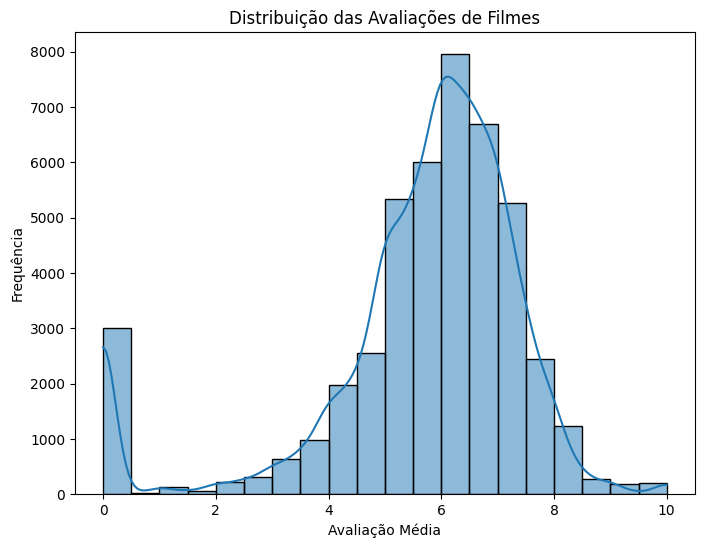

In [ ]:
# Distribuição das Avaliações de Filmes
plt.figure(figsize=(8,6))
sns.histplot(df_movies_clean['vote_average'].dropna(), bins=20, kde=True)
plt.title('Distribuição das Avaliações de Filmes')
plt.xlabel('Avaliação Média')
plt.ylabel('Frequência')
plt.show()

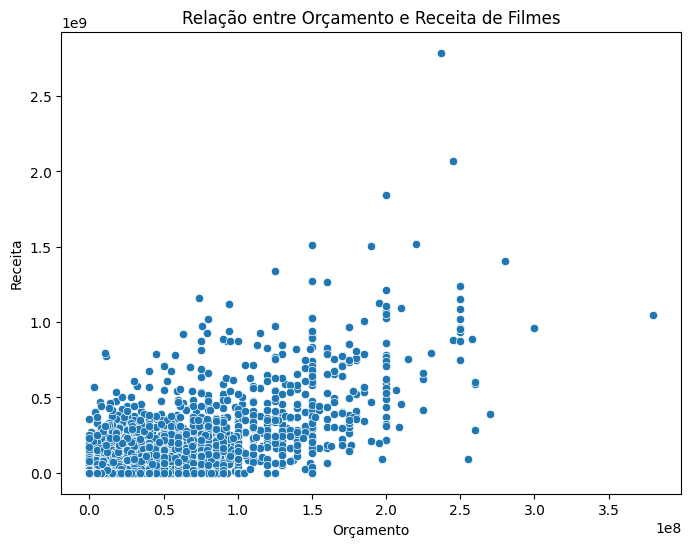

In [38]:
# Relação entre Orçamento e Receita de Filmes
plt.figure(figsize=(8,6))
sns.scatterplot(x='budget', y='revenue', data=df_movies_clean)
plt.title("Relação entre Orçamento e Receita de Filmes")
plt.xlabel('Orçamento')
plt.ylabel('Receita')
plt.show()